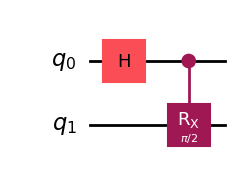

In [44]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.transpiler import generate_preset_pass_manager
from math import pi

qc = QuantumCircuit(2)
qc.h(0)
qc.crx(pi / 2, 0, 1)

qc.draw('mpl')

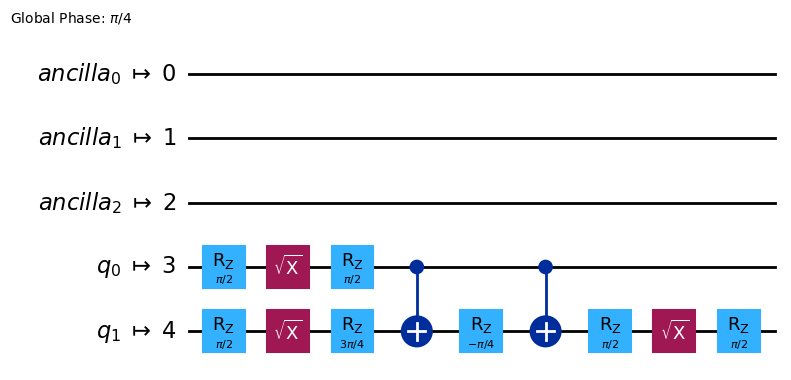

In [45]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
backend = FakeManilaV2()

managaer = generate_preset_pass_manager(optimization_level=3, backend=backend, seed_transpiler=1)
transpiled_qc = managaer.run(qc)

transpiled_qc.draw('mpl')

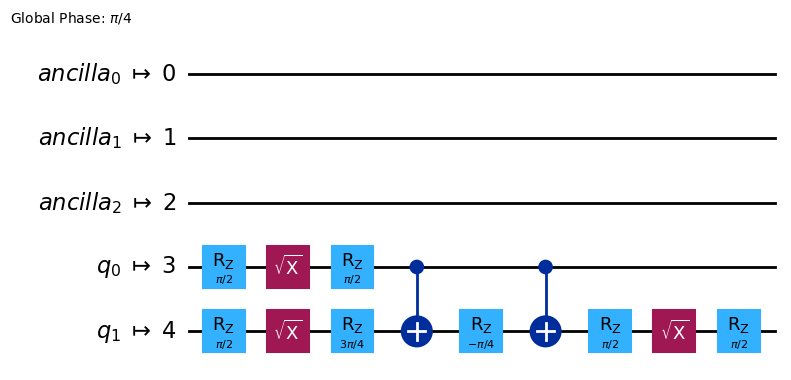

In [46]:
transpiled_circuit = transpile(qc, optimization_level=3, backend=backend,seed_transpiler=1)

transpiled_circuit.draw('mpl')

In [47]:
from qiskit.quantum_info import Statevector

state = Statevector(transpiled_qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [48]:
import warnings
warnings.filterwarnings("ignore")
from qiskit_ibm_runtime import SamplerV2 as sampler

transpiled_qc.measure_all()
job = sampler(backend).run([(transpiled_qc)])
results = job.result()[0].data.meas.get_counts()
results

{'11000': 249, '01000': 247, '00000': 528}

In [49]:
import warnings
warnings.filterwarnings("ignore")
from qiskit_ibm_runtime import SamplerV2 as sampler

transpiled_qc.measure_all()
sample = sampler(backend)
sample.options.dynamical_decoupling.enable = True
sample.options.dynamical_decoupling.sequence_type = 'XY4'

job = sample.run([(transpiled_qc)])
results = job.result()[0].data.meas.get_counts()
results

{'11000': 274, '00000': 504, '01000': 246}